# Tarea 10.7

Considere la ecuación diferencial que se ha resuelto en los ejemplos de clase:

$$
y'(t) = y(t) - t^2 + 1\,,\quad 0 \leq t \leq 2\,,
$$

pero ahora con una condición inicial

$$
y(0) = 0.5 + \delta_o
$$

donde $\delta_o$ es un error cometido al fijar la condición.

* Resuelva esta ecuación usando el método de Euler con una precisión de $10^{-4}$. Considere varios valores de $\delta_o$ entre $-0.1$ y $0.1$ y grafique $y(2)$ en función de $\delta_o$. 

* Compare su resultado con el valor de $y(2)$ obtenido de la solución analítica $y(t) = (t + 1)^2 - 0.5e^t$. Comente.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

Definimos el metodo de Euler con la función vista en clase:

In [73]:
def met_euler(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w)
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

Vamos a definir nuestra función para solucionar con el metodo de euler

In [74]:
def f(t, y):
    return y - t**2 + 1

met_euler(f, 0, 2, 0.5, 10)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([0.5       , 0.8       , 1.152     , 1.5504    , 1.98848   ,
        2.458176  , 2.9498112 , 3.45177344, 3.95012813, 4.42815375,
        4.8657845 ]))

Vamos a definir $\delta_o$ como se nos pide:

In [75]:
delta_o = np.linspace(-0.1, 0.1, 10000)

Ya que tenemos la versión exacta, veremos que pasa si repetimos este calculo pero ingresando algún valor de $\delta_o$

In [94]:
euler_1=met_euler(f, 0, 2, 0.5 + delta_o[1], 10000)
euler_2=met_euler(f, 0, 2, 0.5 + delta_o[137], 10000)
euler_3=met_euler(f, 0, 2, 0.5 + delta_o[5000], 10000)
euler_4=met_euler(f, 0, 2, 0.5 + delta_o[368], 10000)
euler_5=met_euler(f, 0, 2, 0.5 + delta_o[-1], 10000)
euler_6=met_euler(f, 0, 2, 0.5 + delta_o[2047], 10000)

Ahora sabemos que $y(t) = (t + 1)^2 - 0.5e^t$ es la versión exacta por lo que evaluamos en t=2

In [84]:
def exacto(t):
    return (t+1)**2-0.5*(np.exp(t))

In [89]:
y_2_exacto = exacto(2)
y_2_exacto

5.305471950534675

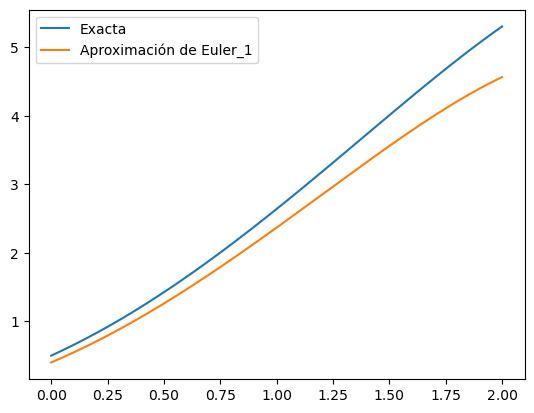

In [92]:
ts = np.linspace(0, 2, 100)
plt.plot(ts, exacto(ts), label='Exacta')
plt.plot(*euler_1, label='Aproximación de Euler_1')
plt.legend()

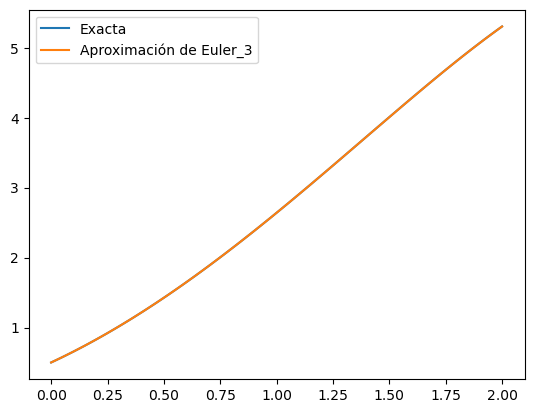

In [96]:
ts = np.linspace(0, 2, 100)
plt.plot(ts, exacto(ts), label='Exacta')
plt.plot(*euler_3, label='Aproximación de Euler_3')
plt.legend()

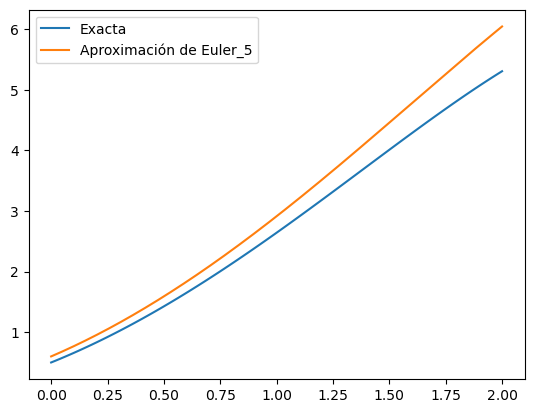

In [97]:
ts = np.linspace(0, 2, 100)
plt.plot(ts, exacto(ts), label='Exacta')
plt.plot(*euler_5, label='Aproximación de Euler_5')
plt.legend()

Notamos que, con los tres gráficos, mientras más pequeño sea $\delta_o$ (como en el segundo gráfico) mejor es la aproximación de Euler, lo cual es consistente. Mientras que en los otros casos (ya sea el primer o tercer gráfico) se aleja bastante al valor exacto.